In [0]:
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import OAuthHandler
from textblob import TextBlob


In [0]:
consumer_api_key = 'Ut69cqnRofEi6ItwiDHuyeXWs'
consumer_api_secret = 'zfX30MmgQT4bX9llT4iARxJoU9adsvHhvshTeu7RUhVcFkNG3L' 
access_token = '4022683452-vOWlJOMeR0rdoKAeCQKs7kVSDXExoFIzuxLt7UQ'
access_token_secret ='ZSyEnbSwH0048FUtU4r5J6B0BUYwMWkUkSQu8baubQVmz'

auth = OAuthHandler(consumer_api_key, consumer_api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [0]:
def remove_url(txt):

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#lockdown -filter:retweets"

tweets_with_url = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   result_type='recent').items(1000)

tweets = [remove_url(tweet.text) for tweet in tweets_with_url]


In [79]:
tweets

['Decided on a westonwoods lockdown walk for a change Missed the place notshit',
 'kawtharrrr joydevivr ikeoluwaaaaaa I know it seems so cool and fancy Im sure it is relaxing right Look',
 'Now India is in top 5 country in world for COVID19 confirmed cases we had a excellent lockdown system first b',
 'What happened to immunity passportsMany now perhaps the majority are immune to COVID19 they cannot pass it on',
 'lockdown house party',
 'Stevie had a new rug today and ponio had hers back off him Hes growing again Cant wait to get them both out and',
 'C4Dispatches thomasmoffatt To me lockdown is like playing a game of hide and seek all the while you remain in t',
 'BorisJohnson Very disappointed Feel very annoyed why we even trying anymore to do what the government have advi',
 'EXCLUSIVE 10DowningStreet ordered ministers to tweet backing for Dominic Cummings OdysseanProject as the publ',
 'Back to my favourite cocktail This Old Ezra 7yo Barrel Strength from HeavenHillDist makes a cra

In [80]:
sentiment = [TextBlob(tweet) for tweet in tweets]

sentiment[0].polarity, sentiment[0]


(0.0,
 TextBlob("Decided on a westonwoods lockdown walk for a change Missed the place notshit"))

In [81]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment]

sentiment_values[0]


[0.0,
 'Decided on a westonwoods lockdown walk for a change Missed the place notshit']

In [82]:
sentiment_data = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_data.head()

,polarity,tweet
0,0.000000,Decided on a westonwoods lockdown walk for a c...
1,0.378571,kawtharrrr joydevivr ikeoluwaaaaaa I know it s...
2,0.537500,Now India is in top 5 country in world for COV...
3,0.000000,What happened to immunity passportsMany now pe...
4,0.000000,lockdown house party


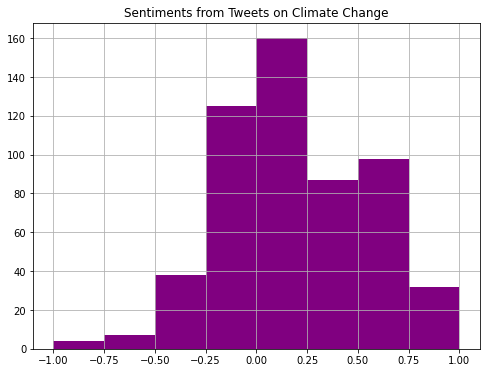

In [83]:
sentiment_data = sentiment_data[sentiment_data.polarity != 0]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_data.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

